# Correlation Matrix Between Feeders

This notebook loads the processed electricity consumption data, computes the correlation matrix between feeders, and visualizes it as a heatmap.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed electricity consumption data
file_path = '../../data/paraguay/electricity-consumption-processed.csv'
df = pd.read_csv(file_path)

In [53]:
# Group data by feeder, create a time series for each feeder with time and consumption
# Assumes columns: 'feeder', 'time', 'consumption' (adjust if your column names differ)
feeder_groups = {}
for feeder, group in df.groupby('feeder'):
    # Sort by time if needed
    group_sorted = group.sort_values('datetime')
    feeder_groups[feeder] = group_sorted[['datetime', 'consumption']].reset_index(drop=True)

## Correlation between feeders

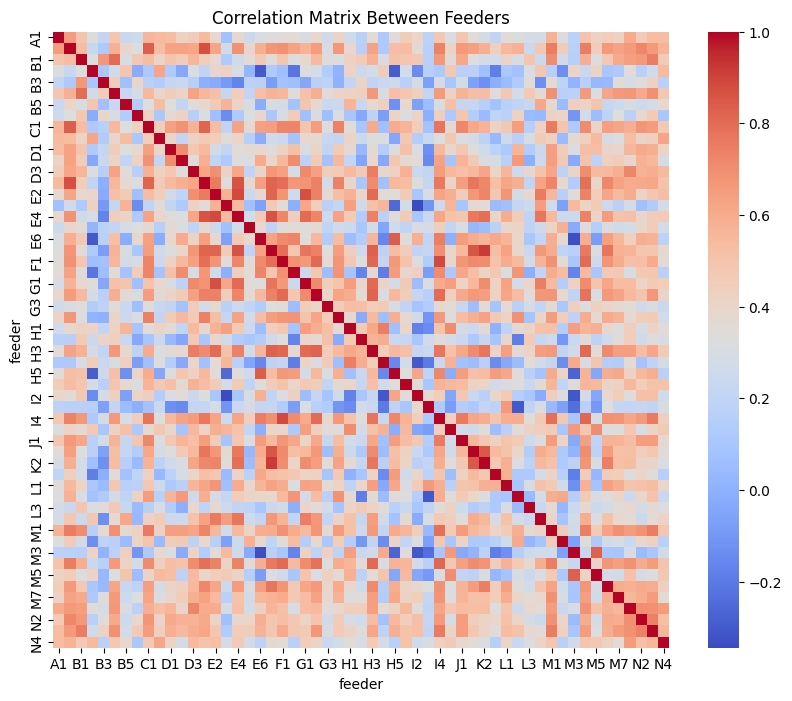

In [54]:
# Build a DataFrame where each column is a feeder's consumption time series, aligned by datetime
# First, pivot the original DataFrame to have datetimes as index and feeders as columns
"""
- A **positive correlation** (close to 1) means the two feeders move together (when one goes up, the other also goes up).
- A **negative correlation** (close to -1) means they move in opposite directions (when one goes up, the other goes down).
- A **correlation near 0** means there is little to no linear relationship; their movements are not strongly related.

So, a low correlation (close to 0) means the two feeders do **not** move very alike. A high positive correlation means they move very alike.
"""

pivot_df = df.pivot_table(index='datetime', columns='feeder', values='consumption')

# Compute the correlation matrix between feeders
corr_matrix = pivot_df.corr()

# Visualize the correlation matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Between Feeders')
plt.show()

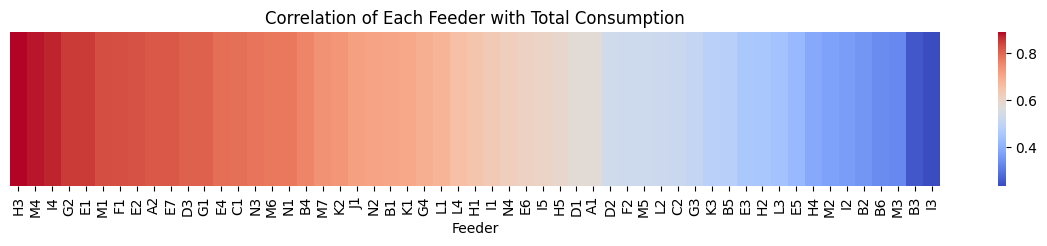

In [55]:
# Compute correlation between each feeder's time series and the total consumption (sum across all feeders at each time)
total_consumption = pivot_df.sum(axis=1)
feeder_total_corr = pivot_df.apply(lambda col: col.corr(total_consumption))

# Display the correlation values
feeder_total_corr = feeder_total_corr.sort_values(ascending=False)

plt.figure(figsize=(15, 2))
sns.heatmap(feeder_total_corr.to_frame().T, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation of Each Feeder with Total Consumption')
plt.yticks([])
plt.xlabel('Feeder')
plt.show()

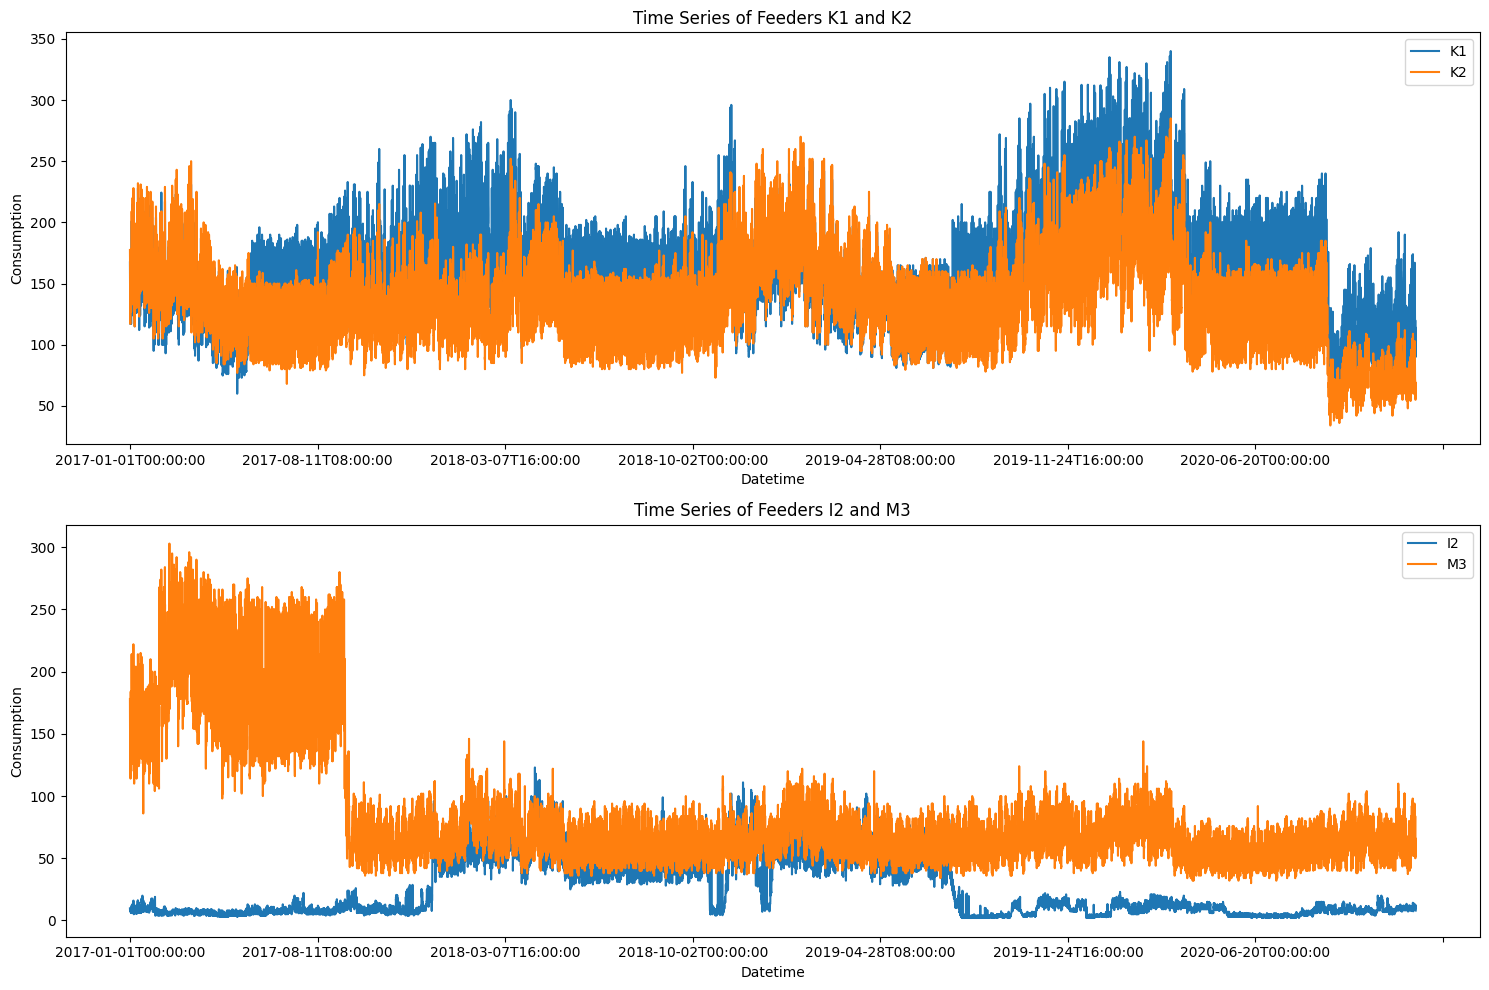

In [56]:
# Plot the time series for feeders K1 and K2
plt.figure(figsize=(15, 10))

# First subplot: K1 and K2
plt.subplot(2, 1, 1)
pivot_df[['K1', 'K2']].plot(ax=plt.gca())
plt.title('Time Series of Feeders K1 and K2')
plt.xlabel('Datetime')
plt.ylabel('Consumption')
plt.legend(['K1', 'K2'])

# Second subplot: I2 and M3
plt.subplot(2, 1, 2)
pivot_df[['I3', 'M3']].plot(ax=plt.gca())
plt.title('Time Series of Feeders I2 and M3')
plt.xlabel('Datetime')
plt.ylabel('Consumption')
plt.legend(['I2', 'M3'])

plt.tight_layout()
plt.show()

## Correlation between substations

C:\Users\knuto\AppData\Local\Temp\ipykernel_30572\3608782711.py:14: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pivot_df_summed = pivot_df_letters.groupby(axis=1, level=0).sum()


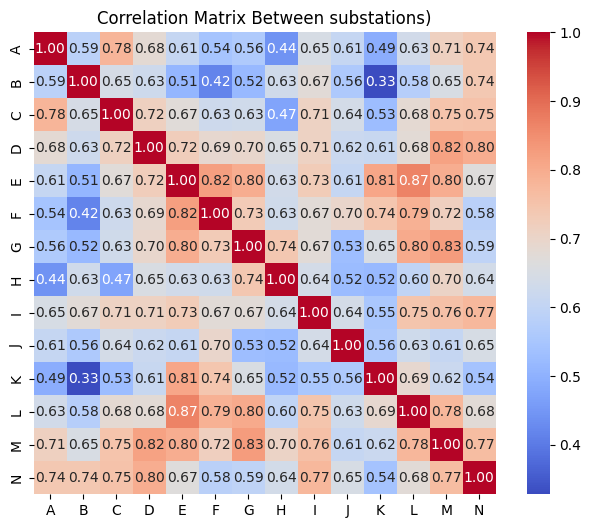

In [57]:
# Sum up all feeders of the same letter (e.g., A1 and A2 into A)
# Assumes feeder names like 'A1', 'A2', ..., 'B1', 'B2', ...
import re

# Extract the letter part from each feeder name
def get_feeder_letter(feeder_name):
    match = re.match(r'([A-Za-z]+)', str(feeder_name))
    return match.group(1) if match else feeder_name

pivot_df_letters = pivot_df.copy()
pivot_df_letters.columns = [get_feeder_letter(col) for col in pivot_df.columns]

# Sum columns with the same letter (i.e., group by letter)
pivot_df_summed = pivot_df_letters.groupby(axis=1, level=0).sum()

# Compute the correlation matrix for the summed feeders
corr_matrix_letters = pivot_df_summed.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_letters, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Between substations)')
plt.show()

## Weather correlation

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
consumption_path = '../../data/paraguay/electricity-consumption-raw.csv'
weather_path = '../../data/paraguay/meteorological-raw.csv'
substations_path = '../../data/paraguay/substations-geographical-location.csv'

# Load data
df_consumption = pd.read_csv(consumption_path)
df_weather = pd.read_csv(weather_path)
df_substations = pd.read_csv(substations_path)

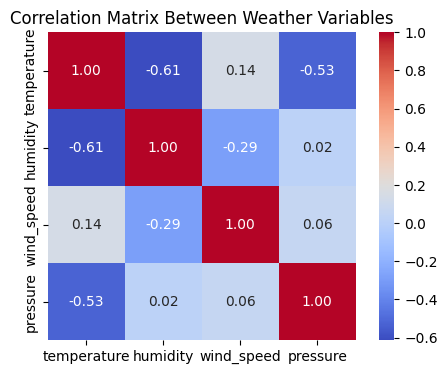

In [59]:
# Compute the correlation matrix between the weather variables
weather_corr_matrix = merged[weather_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weather_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Between Weather Variables')
plt.show()

## Correlation Matrix Between stations and weather variables

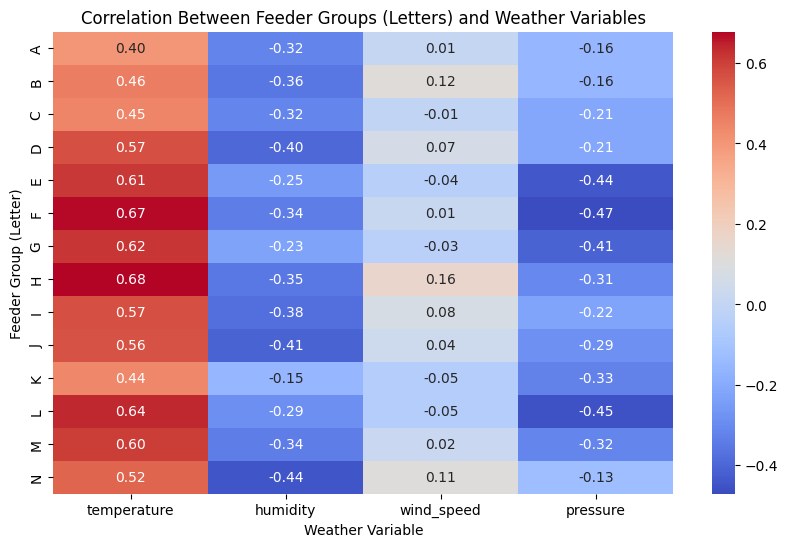

In [61]:
# Keep only rows in pivot_df_summed that match weather datetimes (every third hour)

# Ensure 'datetime' is a column, not just the index

pivot_df_summed_reset = pivot_df_summed.reset_index()

matching_datetimes = df_weather['datetime']

pivot_df_summed_matched = pivot_df_summed_reset[pivot_df_summed_reset['datetime'].isin(matching_datetimes)]

# Merge on datetime

merged = pd.merge(pivot_df_summed_matched, df_weather, on='datetime', how='inner')

# Select only numeric weather columns (excluding 'datetime')

weather_cols = [col for col in df_weather.columns if col != 'datetime' and pd.api.types.is_numeric_dtype(df_weather[col])]

letter_cols = [col for col in pivot_df_summed.columns if col != 'datetime']

# Compute correlation between each letter and each weather variable

corr_weather = merged[letter_cols + weather_cols].corr().loc[letter_cols, weather_cols]

# Plot heatmap of correlations between feeder groups (letters) and weather variables

plt.figure(figsize=(10, 6))

sns.heatmap(corr_weather, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Between Feeder Groups (Letters) and Weather Variables')

plt.ylabel('Feeder Group (Letter)')

plt.xlabel('Weather Variable')

plt.show()